# 1. feladat

A pénzfeldobásos játékot (Penney-féle játék) most 3 játékos játssza. Az "A" játékos sorozata FIFI, a "B" játékosé "IFIF", a "C" játékosé "FFFF". Az nyer, akinek a sorozata először kijön. Határozzuk meg egészre kerekített százalékos értékként az egyes játékosok nyerési valószínűségét. 

## Megoldás

A gráfot először papíron raktam össze. Megnéztem, milyen lehetőseg vannak a "FIF-IFI-FFF" konfigurációban is, azt bővítettem ki. A gráf a 'DiGraph' függvény segítségével megkonstruálható.

In [1]:
# A gráf csúcsai
G = DiGraph([["-", "F", "I", "FF", "FI", "IF", "FFF", "FIF", "IFI", "FFFF", "FIFI", "IFIF"],[]], loops = True)

#A gráf élei
G.add_edges([ 
    ("-", "F"), ("-", "I"), 
    ("F", "FF"), ("F", "FI"), 
    ("I", "IF"), ("I", "I"), 
    ("FF", "FFF"), ("FF", "FI"), 
    ("FI", "FIF"), ("FI", "I"), 
    ("IF", "IFI"), ("IF", "FF"), 
    ("IFI", "IFIF"), ("IFI", "I"),
    ("FIF", "FIFI"), ("FIF", "FF"), 
    ("FFF", "FFFF"), ("FFF", "FI")
])

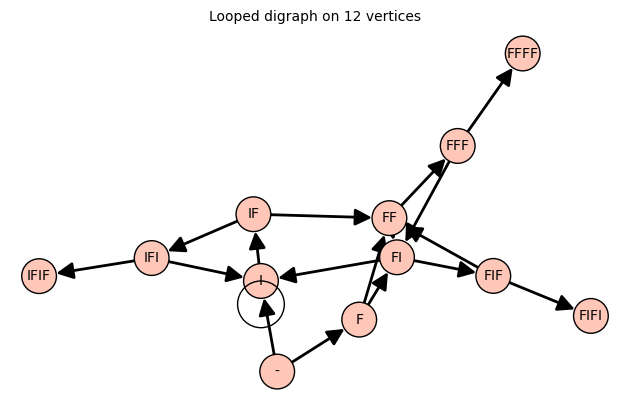

In [2]:
G

A gráf "bezárható", ha a célmezőket összekötjük a kiinduló mezővel.

In [3]:
G.add_edges( [("FIFI", "-"), ("FFFF", "-"), ("IFIF", "-") ])

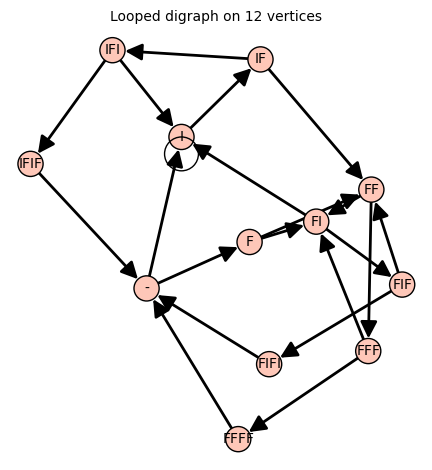

In [4]:
G

Ez egy Markov-láncot eredményez, melynek speciális esete könnyen és megbízhatóan kezelhető. Vizsgáljuk ki a lánc tulajdonságat.
- **Irreducibilis?** - Igen! Látható, hogy a kezdő mezőből minden mező bejárható a célmezőkig, ahonnan visszakerülünk a kezdő mezőre.
- **Aperiodikus?** - Igen! Az **I** &rarr;**I** él miatt.

Ha irreducibilis és aperiodikus a Markov lánc, egyetlen stacionárius eloszlása létezik, melyet egy adott átmeneti mátrix alapján végtelen lépést megtéve meg tudunk határozni.

A stacionárius eloszlást reprezentáló mátrix megadja, hogy **A** mezőből indulva mekkora eséllyel leszünk **B** mezőben végtlen lépés után. Az **A** mezőt a start mezőnek, és **B** mezőt az egyik játkos győzelméhez tartozó csúcsnak tekintjük, tulajdonképpen leolvashatjuk a játékos nyerési valószínűségét a mátrix megfelelő eleméből.

Így a következő lépés az átmeneti mátrix végtelenedik hatványának numerikus közelítése*.

*Kérdés, hogy mikor lesz "elég közel" a megoldásunk, illetve hogy viselkedik a mátrix nagy lépésszámokra - lehet $N=10^{100}$ után másik értékekhez konvergálnak a mátrix elemei. Az utóbbit hanyagoljuk.

In [5]:
M = G.adjacency_matrix(vertices = ["-", "F", "I", "FF", "FI", "IF", "FFF", "FIF", "IFI", "FFFF", "FIFI", "IFIF"])
M

[0 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 0 0 0 0 0 0]
[0 0 1 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 1 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0]
[0 0 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 0 0 1 0]
[0 0 1 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0]

In [6]:
N = 1/2.0* M # mindenhol 50%-50%, az átmenet, kivéve a lentieknél

# a célba érve 100% eséllyel visszakerülünk a kezdő mezőre
N[9,0] = 1
N[10,0] = 1
N[11,0] = 1

numerical_approx(N^1, digits = 2)

[0.00 0.50 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.50 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.50 0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.50 0.00 0.50 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.50 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.50 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.50 0.00 0.00]
[0.00 0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.00]
[0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.50]
[ 1.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[ 1.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[ 1.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]

Nézzük meg, hogy mi lesz a stacionárius eloszlást reprezentáló mátrix.

In [7]:
numerical_approx(N^100, digits = 2)

[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]
[0.087 0.044  0.26  0.11  0.11  0.13 0.057 0.053 0.065 0.028 0.027 0.032]

Honnan tudjuk, hogy ez elég jó-e? Az $n=75$ és $n=1000$ lépésszámokhoz tartozó átmeneti mátrixok tíz tizedesig egyeznek, ez már bíztató megoldás.

In [8]:
numerical_approx(N^1000, digits = 10)==numerical_approx(N^75, digits = 10)

True

### A nyerési valószínűségek :

| FFFF | FIFI | IFIF |
| :-------------: | :-------------: | :-------------: |
| 2.8% | 2.7% | 3.2% |